In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 200 

In [3]:
df = pd.read_csv("C:\\Users\\Akram siddiqui\\documents\\ExcelR\\Data science assignments\\EDA2\\adult_with_headers.csv")
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df.boxplot()
plt.tight_layout()

In [5]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
df['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [7]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

## Scaling

In [8]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [9]:
sc = StandardScaler()
mn = MinMaxScaler()

In [10]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

In [11]:
sc_df = pd.DataFrame(sc.fit_transform(df[numeric_columns]), columns=numeric_columns)
mn_df = pd.DataFrame(mn.fit_transform(df[numeric_columns]), columns=numeric_columns)


In [12]:
sc_df.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429


In [13]:
mn_df.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.301370,0.044302,0.800000,0.02174,0.0,0.397959
1,0.452055,0.048238,0.800000,0.00000,0.0,0.122449
2,0.287671,0.138113,0.533333,0.00000,0.0,0.397959
3,0.493151,0.151068,0.400000,0.00000,0.0,0.397959
4,0.150685,0.221488,0.800000,0.00000,0.0,0.397959


## Encoding

In [14]:
pd.get_dummies(data = df, columns=['race','sex','income'], dtype=int)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,...,native_country,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,2174,0,...,United-States,0,0,0,0,1,0,1,1,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,0,0,...,United-States,0,0,0,0,1,0,1,1,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,0,0,...,United-States,0,0,0,0,1,0,1,1,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,0,0,...,United-States,0,0,1,0,0,0,1,1,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,0,0,...,Cuba,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,0,0,...,United-States,0,0,0,0,1,1,0,1,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,0,0,...,United-States,0,0,0,0,1,0,1,0,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,0,0,...,United-States,0,0,0,0,1,1,0,1,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,0,0,...,United-States,0,0,0,0,1,0,1,1,0


In [15]:
df = pd.get_dummies(data = df, columns=['race','sex','income'], dtype=int)

In [16]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,...,native_country,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,2174,0,...,United-States,0,0,0,0,1,0,1,1,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,0,0,...,United-States,0,0,0,0,1,0,1,1,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,0,0,...,United-States,0,0,0,0,1,0,1,1,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,0,0,...,United-States,0,0,1,0,0,0,1,1,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,0,0,...,Cuba,0,0,1,0,0,1,0,1,0


In [17]:
label_encoder = LabelEncoder()

In [18]:
categorical_columns = ['workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','capital_gain','capital_loss','hours_per_week','native_country']

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [19]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,...,native_country,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
0,39,7,2671,9,12,4,1,1,25,0,...,39,0,0,0,0,1,0,1,1,0
1,50,6,2926,9,12,2,4,0,0,0,...,39,0,0,0,0,1,0,1,1,0
2,38,4,14086,11,8,0,6,1,0,0,...,39,0,0,0,0,1,0,1,1,0
3,53,4,15336,1,6,2,6,0,0,0,...,39,0,0,1,0,0,0,1,1,0
4,28,4,19355,9,12,2,10,5,0,0,...,5,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,16528,7,11,2,13,5,0,0,...,39,0,0,0,0,1,1,0,1,0
32557,40,4,8080,11,8,2,7,0,0,0,...,39,0,0,0,0,1,0,1,0,1
32558,58,4,7883,11,8,6,1,4,0,0,...,39,0,0,0,0,1,1,0,1,0
32559,22,4,12881,11,8,4,1,3,0,0,...,39,0,0,0,0,1,0,1,1,0


In [ ]:
df.boxplot()
plt.tight_layout()

In [ ]:
df.hist()
plt.tight_layout()

In [21]:
df.corr()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,...,native_country,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
age,1.000000,0.003787,-0.078458,-0.010508,0.036527,-0.266288,-0.020947,-0.263698,0.125911,0.065049,...,-0.001151,-0.010137,-0.011111,-0.019434,-0.034415,0.033412,-0.088832,0.088832,-0.234037,0.234037
workclass,0.003787,1.000000,-0.018443,0.023513,0.052085,-0.064731,0.254892,-0.090461,0.029347,0.015615,...,-0.007690,-0.020218,0.004347,-0.059979,-0.014505,0.057208,-0.095981,0.095981,-0.051604,0.051604
fnlwgt,-0.078458,-0.018443,1.000000,-0.027068,-0.042849,0.030125,0.003469,0.007016,-0.004592,-0.009903,...,-0.057048,-0.069967,-0.059170,0.110241,0.012180,-0.046394,-0.025758,0.025758,0.010549,-0.010549
education,-0.010508,0.023513,-0.027068,1.000000,0.359153,-0.038407,-0.021260,-0.010876,0.031383,0.016113,...,0.064288,-0.006098,0.010708,-0.021464,-0.028896,0.021704,0.027356,-0.027356,-0.079317,0.079317
education_num,0.036527,0.052085,-0.042849,0.359153,1.000000,-0.069304,0.109697,-0.094153,0.154410,0.084166,...,0.050840,-0.029345,0.062091,-0.075272,-0.044133,0.051353,-0.012280,0.012280,-0.335154,0.335154
marital_status,-0.266288,-0.064731,0.030125,-0.038407,-0.069304,1.000000,-0.009654,0.185451,-0.075138,-0.035240,...,-0.023819,-0.002994,0.017669,0.081600,0.016652,-0.080376,0.129314,-0.129314,0.199307,-0.199307
occupation,-0.020947,0.254892,0.003469,-0.021260,0.109697,-0.009654,1.000000,-0.075607,0.026252,0.017342,...,-0.012543,-0.003593,0.003840,-0.011053,0.001582,0.007897,-0.080296,0.080296,-0.075468,0.075468
relationship,-0.263698,-0.090461,0.007016,-0.010876,-0.094153,0.185451,-0.075607,1.000000,-0.093147,-0.064284,...,-0.005507,0.025190,0.011226,0.138081,0.015998,-0.131913,0.582454,-0.582454,0.250918,-0.250918
capital_gain,0.125911,0.029347,-0.004592,0.031383,0.154410,-0.075138,0.026252,-0.093147,1.000000,-0.056970,...,0.006940,-0.002289,-0.000126,-0.032549,-0.011633,0.030858,-0.077589,0.077589,-0.340016,0.340016
capital_loss,0.065049,0.015615,-0.009903,0.016113,0.084166,-0.035240,0.017342,-0.064284,-0.056970,1.000000,...,0.001368,-0.013174,0.004859,-0.022361,-0.007713,0.021862,-0.049544,0.049544,-0.162514,0.162514


In [22]:
sns.heatmap(df.corr(),annot = True)

<Axes: >

In [23]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,...,native_country,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
0,39,7,2671,9,12,4,1,1,25,0,...,39,0,0,0,0,1,0,1,1,0
1,50,6,2926,9,12,2,4,0,0,0,...,39,0,0,0,0,1,0,1,1,0
2,38,4,14086,11,8,0,6,1,0,0,...,39,0,0,0,0,1,0,1,1,0
3,53,4,15336,1,6,2,6,0,0,0,...,39,0,0,1,0,0,0,1,1,0
4,28,4,19355,9,12,2,10,5,0,0,...,5,0,0,1,0,0,1,0,1,0


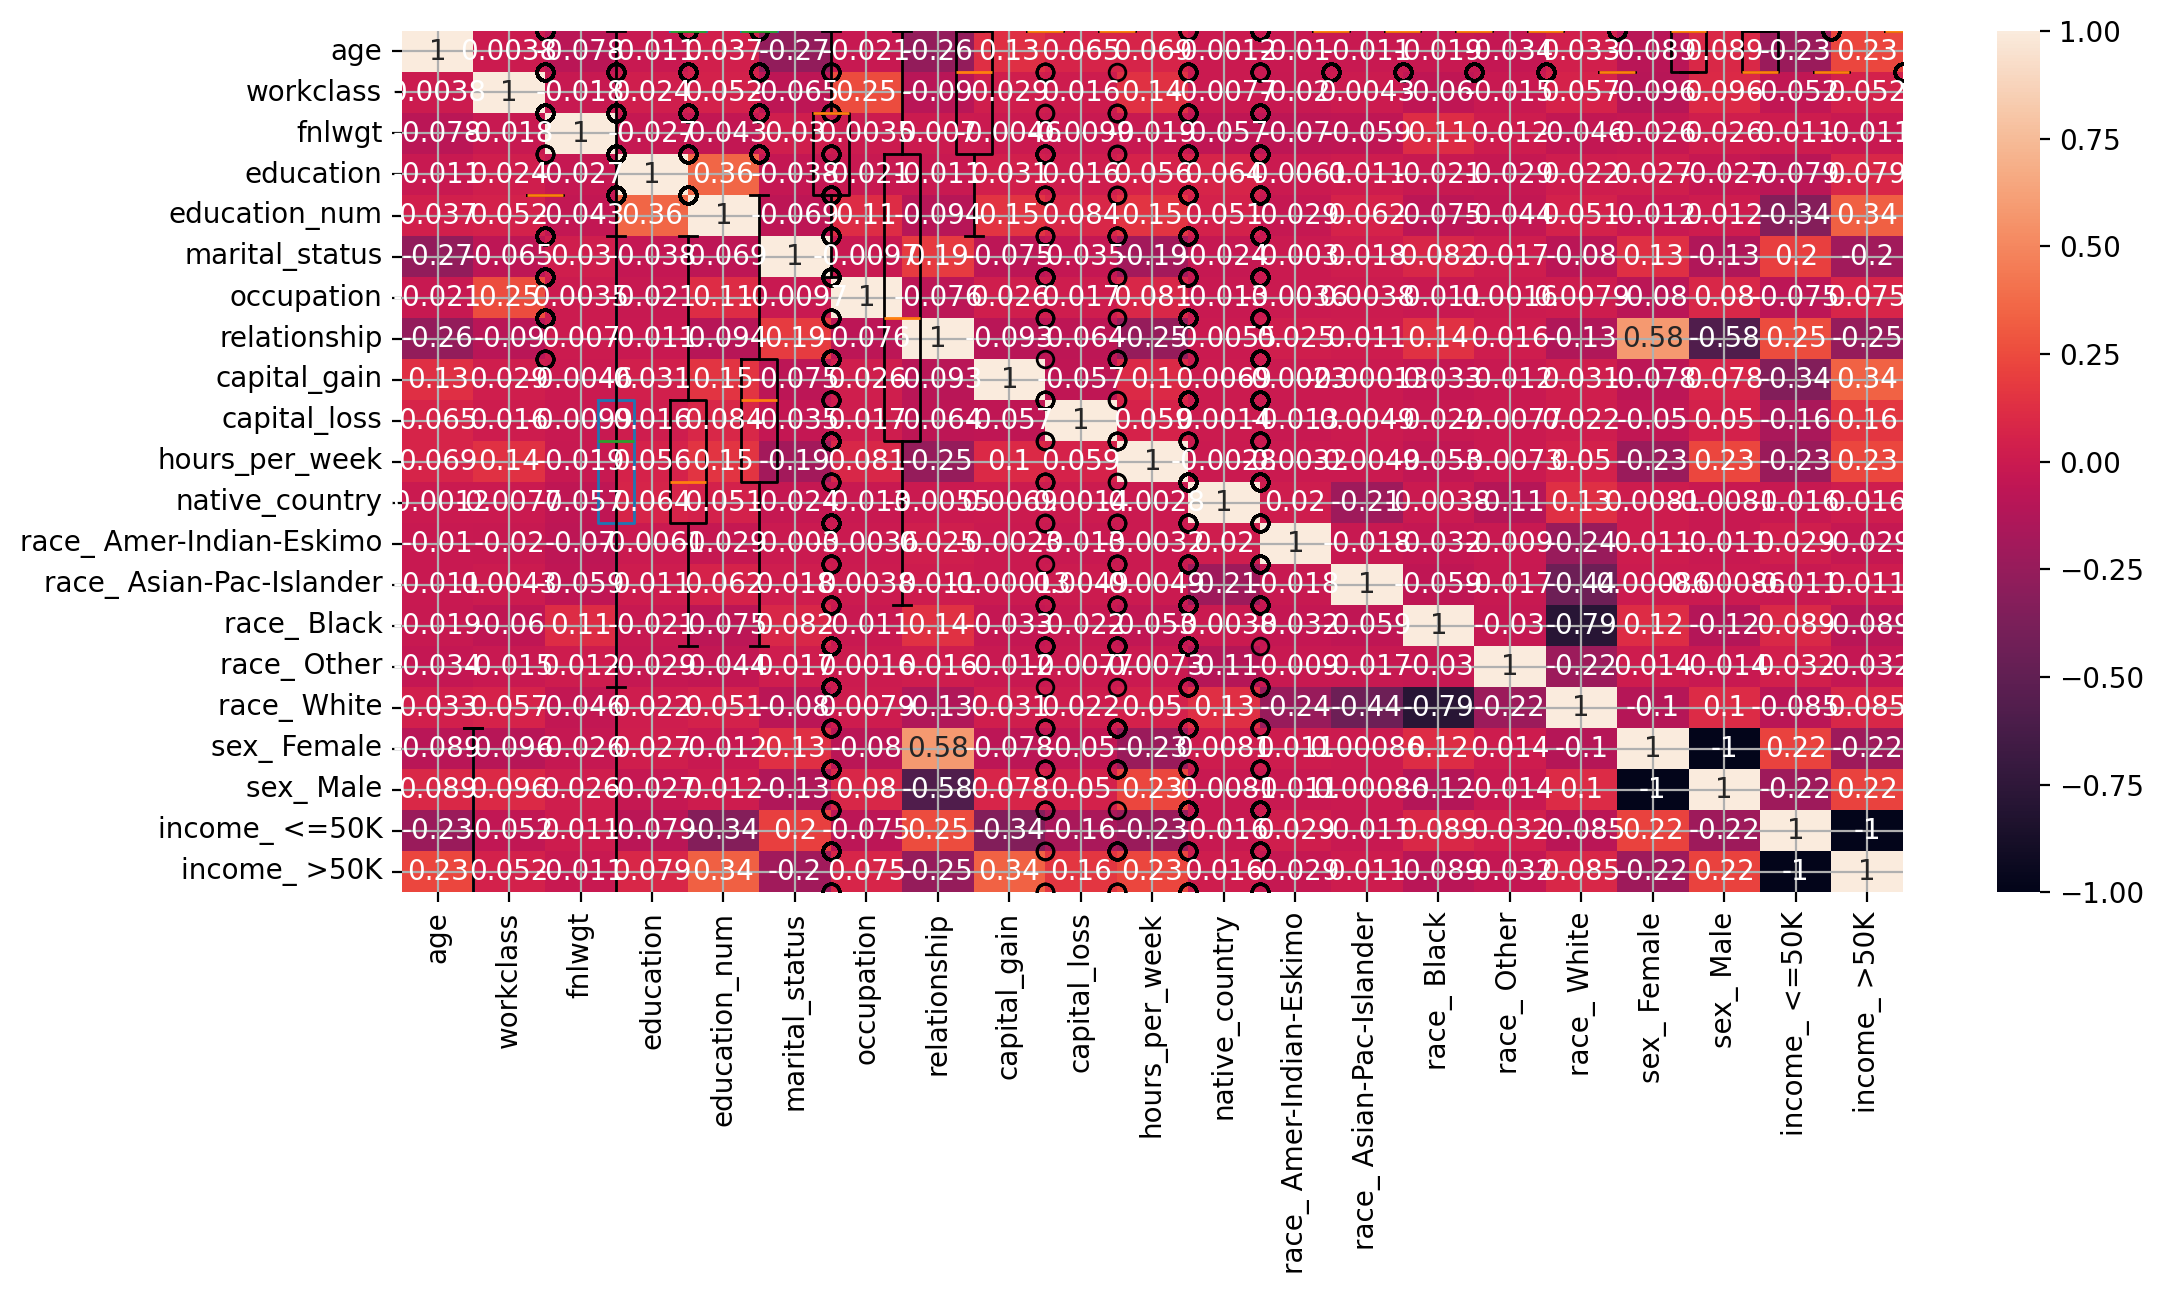

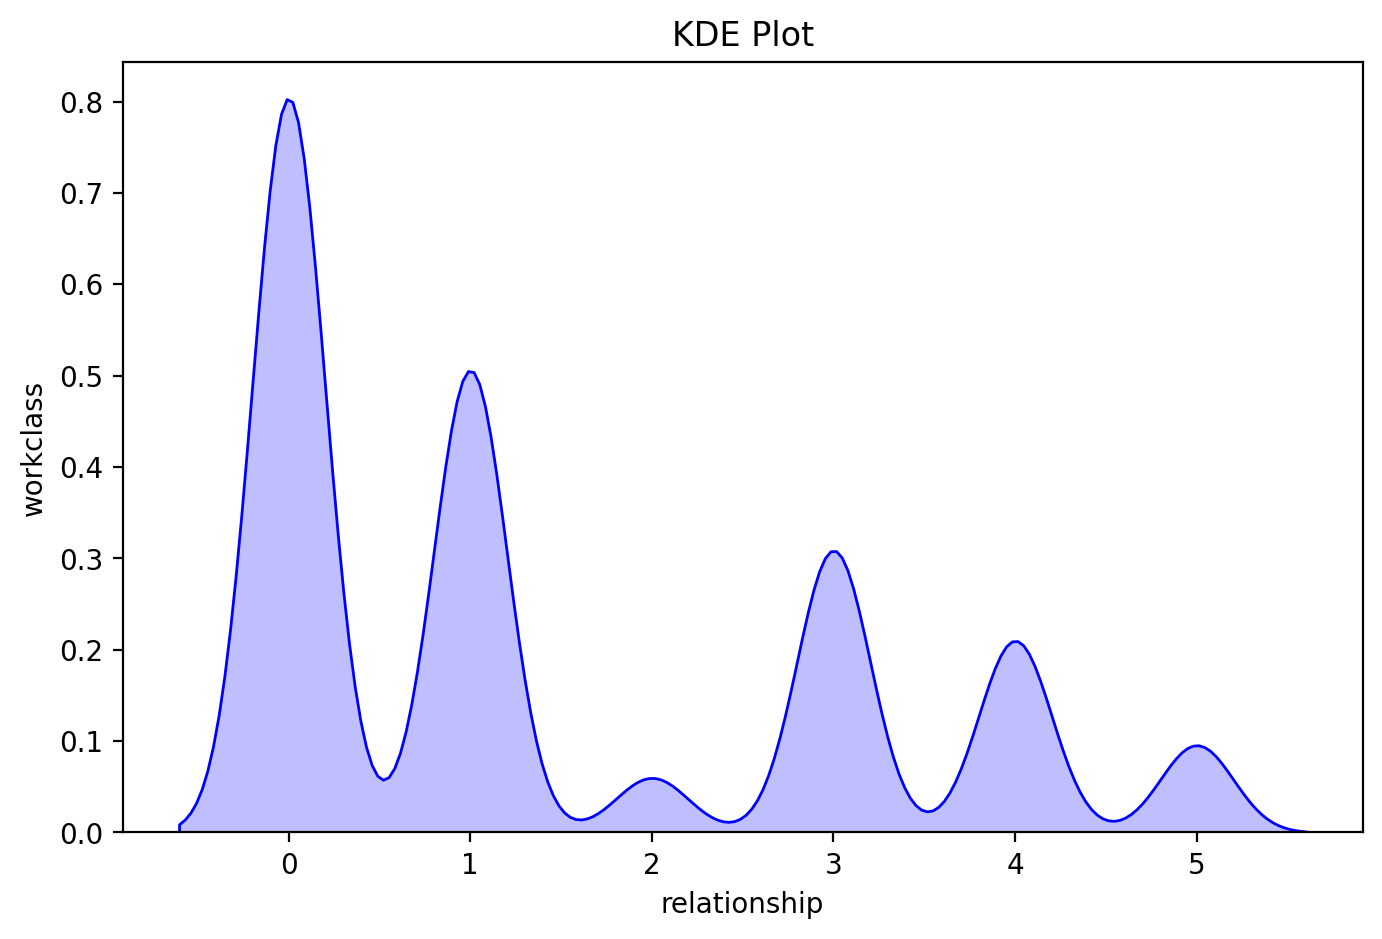

In [24]:
def plot_kde(data, column, shade=True, color="blue"):
    """Plots a KDE plot for a given DataFrame column or array-like data."""
    plt.figure(figsize=(8, 5))
    sns.kdeplot(data[column] if isinstance(column, str) else column, shade=shade, color=color)
    plt.title("KDE Plot")
    plt.xlabel("relationship")
    plt.ylabel("workclass")
    plt.show()
plot_kde(df,"relationship")

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   age                       32561 non-null  int64
 1   workclass                 32561 non-null  int32
 2   fnlwgt                    32561 non-null  int64
 3   education                 32561 non-null  int32
 4   education_num             32561 non-null  int64
 5   marital_status            32561 non-null  int32
 6   occupation                32561 non-null  int32
 7   relationship              32561 non-null  int32
 8   capital_gain              32561 non-null  int64
 9   capital_loss              32561 non-null  int64
 10  hours_per_week            32561 non-null  int64
 11  native_country            32561 non-null  int32
 12  race_ Amer-Indian-Eskimo  32561 non-null  int32
 13  race_ Asian-Pac-Islander  32561 non-null  int32
 14  race_ Black               32561 non-nu

In [26]:
df.describe()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,...,native_country,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,...,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,3.868892,10498.892479,10.298210,9.080679,2.611836,6.572740,1.446362,6.501213,2.053285,...,36.718866,0.009551,0.031909,0.095943,0.008323,0.854274,0.330795,0.669205,0.759190,0.240810
std,13.640433,1.455960,6048.972814,3.870264,2.572720,1.506222,4.228857,1.606771,23.300287,10.056564,...,7.823782,0.097264,0.175761,0.294518,0.090851,0.352837,0.470506,0.470506,0.427581,0.427581
min,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,4.000000,5396.000000,9.000000,8.000000,2.000000,3.000000,0.000000,0.000000,0.000000,...,39.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,37.000000,4.000000,10348.000000,11.000000,9.000000,2.000000,7.000000,1.000000,0.000000,0.000000,...,39.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
75%,48.000000,4.000000,15487.000000,12.000000,11.000000,4.000000,10.000000,3.000000,0.000000,0.000000,...,39.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,90.000000,8.000000,21647.000000,15.000000,15.000000,6.000000,14.000000,5.000000,118.000000,91.000000,...,41.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Feature Engineering

In [27]:
df['age_bins'] = pd.cut(df['age'], bins=[0, 25, 50, 75, 100], labels=['Young', 'Middle-aged', 'Senior', 'Old'])
df['hours_per_week_bins'] = pd.cut(df['hours_per_week'], bins=[0, 20, 40, 60, 100], labels=['Low', 'Medium', 'High', 'Very High'])
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,...,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,income_ <=50K,income_ >50K,age_bins,hours_per_week_bins
0,39,7,2671,9,12,4,1,1,25,0,...,0,0,0,1,0,1,1,0,Middle-aged,Medium
1,50,6,2926,9,12,2,4,0,0,0,...,0,0,0,1,0,1,1,0,Middle-aged,Low
2,38,4,14086,11,8,0,6,1,0,0,...,0,0,0,1,0,1,1,0,Middle-aged,Medium
3,53,4,15336,1,6,2,6,0,0,0,...,0,1,0,0,0,1,1,0,Senior,Medium
4,28,4,19355,9,12,2,10,5,0,0,...,0,1,0,0,1,0,1,0,Middle-aged,Medium


## IsolationForest

In [28]:
iso = IsolationForest()
ypred = iso.fit_predict(df[numeric_columns]) 
df['ypred'] = ypred
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,...,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,income_ <=50K,income_ >50K,age_bins,hours_per_week_bins,ypred
0,39,7,2671,9,12,4,1,1,25,0,...,0,0,1,0,1,1,0,Middle-aged,Medium,1
1,50,6,2926,9,12,2,4,0,0,0,...,0,0,1,0,1,1,0,Middle-aged,Low,1
2,38,4,14086,11,8,0,6,1,0,0,...,0,0,1,0,1,1,0,Middle-aged,Medium,1
3,53,4,15336,1,6,2,6,0,0,0,...,1,0,0,0,1,1,0,Senior,Medium,1
4,28,4,19355,9,12,2,10,5,0,0,...,1,0,0,1,0,1,0,Middle-aged,Medium,1


# ppscore

In [ ]:
!pip install ppscore